Total number of properties: 617
Details of each property used on 2 or more ships:
Thing: GeneratorEngine1, Property: CFWOutletTemp, Number of Ships: 52
Thing: GeneratorEngine1, Property: FOInletTemp, Number of Ships: 52
Thing: GeneratorEngine1, Property: WindingTempR, Number of Ships: 52
Thing: GeneratorEngine1, Property: WindingTempS, Number of Ships: 52
Thing: GeneratorEngine1, Property: WindingTempT, Number of Ships: 52
Thing: GeneratorEngine2, Property: FOInletTemp, Number of Ships: 52
Thing: GeneratorEngine2, Property: WindingTempR, Number of Ships: 52
Thing: GeneratorEngine2, Property: WindingTempS, Number of Ships: 52
Thing: GeneratorEngine2, Property: WindingTempT, Number of Ships: 52
Thing: GeneratorEngine1, Property: Cy1ExhGasOutletTemp, Number of Ships: 51
Thing: GeneratorEngine1, Property: Cy2ExhGasOutletTemp, Number of Ships: 51
Thing: GeneratorEngine1, Property: Cy3ExhGasOutletTemp, Number of Ships: 51
Thing: GeneratorEngine1, Property: Cy4ExhGasOutletTemp, Number of Ship

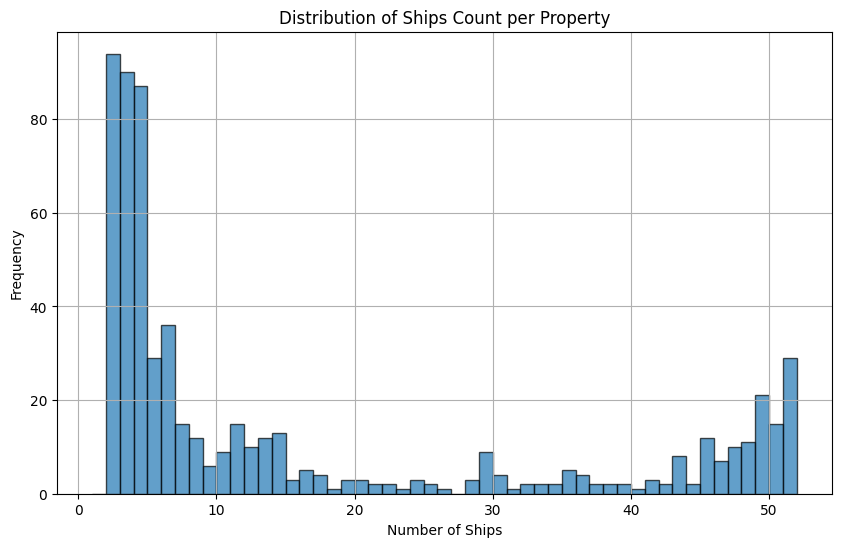

In [8]:
import psycopg2
import matplotlib.pyplot as plt

# Function to read the db connection info
def read_db_connection_info(filename="../../db_connection_info.txt"):
    connection_info = {}
    with open(filename, 'r') as file:
        for line in file:
            key, value = line.strip().split('=')
            connection_info[key] = value
    return connection_info

# Load the connection info
connection_info = read_db_connection_info()

try:
    # Connect to the database
    conn = psycopg2.connect(
        host=connection_info["host"],
        user=connection_info["user"],
        password=connection_info["password"],
        dbname=connection_info["database"],
        port=connection_info["port"]
    )
    cursor = conn.cursor()

    # Query to find out how many ships each type of thing was used on
    query_ships_per_property = """
    SELECT thing, property, COUNT(DISTINCT ships_idx) AS ships_count
    FROM data_mapping
    WHERE ships_idx BETWEEN 1000 AND 1900
    AND thing <> 'ISS.AMS.DataGroup01.T' 
    AND thing <> 'ElectricEnergyConsumeThing' 
    AND thing <> 'LFSS' 
    AND thing <> 'GCUThing' 
    AND thing <> '$UNMAPPED'
    GROUP BY thing, property
    HAVING COUNT(DISTINCT ships_idx) >= 2
    ORDER BY ships_count DESC, thing, property;
    """
    cursor.execute(query_ships_per_property)

    # Fetch and print the result
    ships_per_property = cursor.fetchall()
    # Print the total number of properties
    print("Total number of properties:", len(ships_per_property))
    
    # Print details for each property
    print("Details of each property used on 2 or more ships:")
    for thing, property, ships_count in ships_per_property:
        print(f"Thing: {thing}, Property: {property}, Number of Ships: {ships_count}")

    # Plot the distribution of ships_count
    ships_count_values = [count for _, _, count in ships_per_property]

    plt.figure(figsize=(10, 6))
    plt.hist(ships_count_values, bins=range(1, max(ships_count_values)+1), edgecolor='black', alpha=0.7)
    plt.title('Distribution of Ships Count per Property')
    plt.xlabel('Number of Ships')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Close the cursor and connection
    cursor.close()
    conn.close()
    
except Exception as e:
    print(f"An error occurred: {e}")


GeneratorEngine#, CFWOutletTemp, 162
GeneratorEngine#, FOInletTemp, 165
GeneratorEngine#, WindingTempR, 165
GeneratorEngine#, WindingTempS, 165
GeneratorEngine#, WindingTempT, 165
GeneratorEngine#, Cy#ExhGasOutletTemp, 1149
GeneratorEngine#, FOInletPress, 161
GeneratorEngine#, RPM, 161
GeneratorEngine#, ScavTemp, 162
GeneratorEngine#, Current, 148
GeneratorEngine#, ScavPress, 158
GeneratorEngine#, Voltage, 146
GeneratorEngine#, Frequency, 145
GeneratorEngine#, CFWInletPress, 153
GeneratorEngine#, CFWInletTemp, 150
GeneratorEngine#, Power, 136
GeneratorEngine#, RunningState, 149
GeneratorEngine#, LOInletTemp, 144
GeneratorEngine#, LOInletPress, 139
GeneratorEngine#, DoUse, 65
GeneratorEngine#, LTInletPress, 112
GeneratorEngine#, LTInletTemp, 106
GeneratorEngine#, LoadFactor, 95
GeneratorEngine#, FOFilterInletPress, 95
GeneratorEngine#, LOFilterInletPress, 93
GeneratorEngine#, LTOutletTemp, 83
GeneratorEngine#, SAPress, 79
GeneratorEngine#, Load, 58
GeneratorEngine#, busBarVoltage, 46
Ge

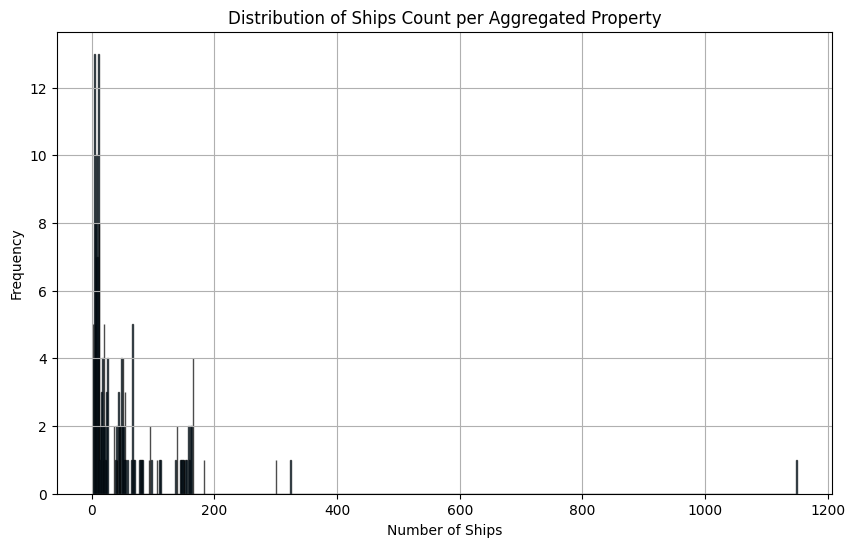

In [6]:
import re

# Assuming ships_per_property is your list of tuples [(thing, property, ships_count), ...]

# Initialize an empty dictionary to hold the aggregated counts
aggregated_data = {}

for thing, property, ships_count in ships_per_property:
    # Replace all digits in the thing and property names with '#'
    modified_thing = re.sub(r'\d+', '#', thing)
    modified_property = re.sub(r'\d+', '#', property)

    # Initialize nested dictionary if the modified thing does not exist
    if modified_thing not in aggregated_data:
        aggregated_data[modified_thing] = {}

    # Aggregate ship counts by modified property under each modified thing
    if modified_property in aggregated_data[modified_thing]:
        aggregated_data[modified_thing][modified_property] += ships_count
    else:
        aggregated_data[modified_thing][modified_property] = ships_count

for modified_thing in aggregated_data:    
    for modified_property, ships_count in aggregated_data[modified_thing].items():
            print(f"{modified_thing}, {modified_property}, {ships_count}")

# Plot the distribution of ships_count
plt.figure(figsize=(10, 6))
plt.hist(ships_count_values, bins=range(1, max(ships_count_values)+1), edgecolor='black', alpha=0.7)
plt.title('Distribution of Aggregated Ships Count per Property')
plt.xlabel('Number of Ships')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [11]:
import csv

# Write the filtered aggregated results to a CSV file
with open('master_model.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Write the header
    csvwriter.writerow(['thing', 'property', 'ships_count'])

    # Write the data
    for modified_thing in aggregated_data:    
        for modified_property, ships_count in aggregated_data[modified_thing].items():
            csvwriter.writerow([modified_thing, modified_property, ships_count])
